Implementation for image classification on fashion dataset


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Loading fashion dataset from keras datasets. The dataset have 10 class variables identified by the labels.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

The dimensions of data is identified. Total rows for train is 60,000 and test data is 10,000 with each image of 28*28.

In [5]:
train_data.shape

(60000, 28, 28)

In [6]:
test_data.shape

(10000, 28, 28)

Drawing one of the fashion image data using matplot lib.

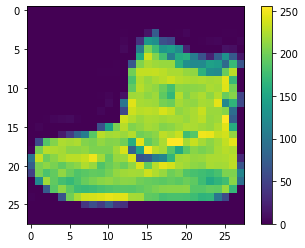

In [9]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

Dividing the images by 255 to get values between 0 and 1

In [11]:
train_data = train_data / 255.0

test_data = test_data / 255.0

Building a neural network model 

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Using ADAM optimizer and SparseCategoricalCrossEntropy as loss function and finding accuracy scores.

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [21]:
model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4969 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2573 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2471 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

Testing for accuracy

In [22]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3399 - accuracy: 0.8832

Test accuracy: 0.8831999897956848


Adding a softmax layer to get predictions.

In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_data)

In [25]:
predictions[0]

array([9.8942699e-08, 5.4999678e-08, 5.1790948e-08, 7.9954980e-11,
       8.3992200e-09, 1.3562113e-04, 1.2147681e-08, 9.6915141e-03,
       1.9420170e-07, 9.9017239e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Predicting results and plotting the image

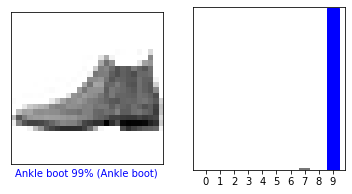

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

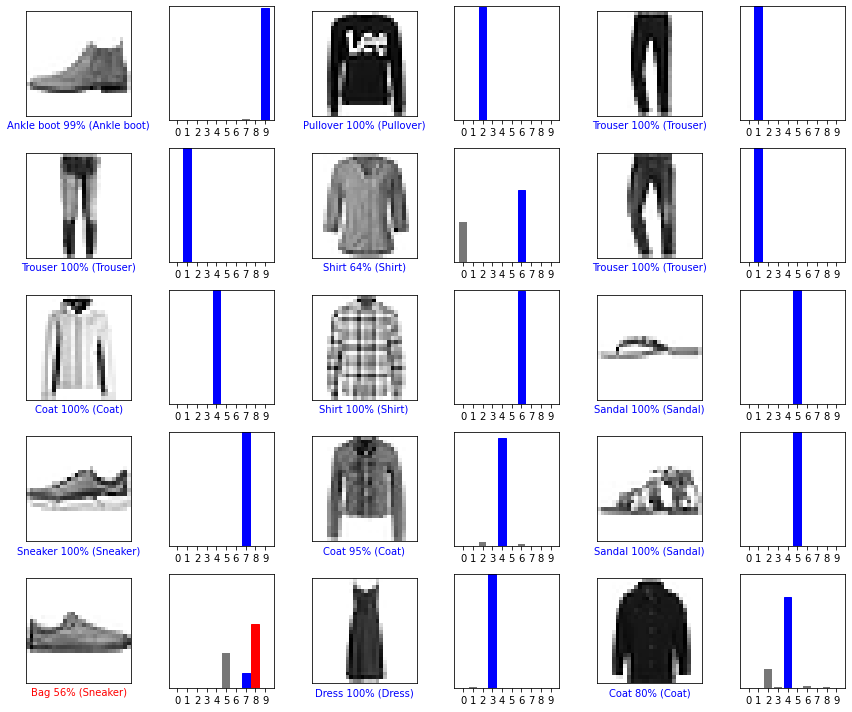

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
# Grab an image from the test dataset.
img = test_data[1]

print(img.shape)

(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.0955725e-04 7.3036098e-11 9.9555391e-01 5.3590670e-09 2.7034681e-03
  9.3689612e-10 1.4329106e-03 4.1597719e-08 1.3003061e-07 5.1709284e-12]]


Plotting image for predicting the correct class variable among all.

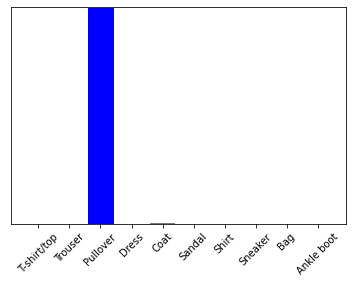

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Getting the class value of the image

In [37]:
np.argmax(predictions_single[0])

2